## 1. 初始準備

In [1]:
%env KERAS_BACKEND = tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ipywidgets import interact, IntSlider, Button

#Keras function
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


## 2. 讀入MNIST數據庫&整理

### 2-1 讀入數據庫

In [3]:
#Keras dataset
from keras.datasets import mnist

from keras.utils import to_categorical

(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data()

print('There are %d training data with size %d X %d' % x_train0.shape)
print('There are %d testing data with size %d X %d' % x_test0.shape)

There are 60000 training data with size 28 X 28
There are 10000 testing data with size 28 X 28


### 2-2 整理輸入輸出的格式

In [0]:
x_train = x_train0.reshape(60000, 28*28)
x_test = x_test0.reshape(10000, 28*28)

In [0]:
x_train = (x_train - x_train.min())/(x_train.max() - x_train.min())
x_test = (x_test - x_test.min())/(x_test.max() - x_test.min())

In [0]:
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

## 3. Function API 

In [0]:
from keras.models import Model
from keras.layers import Input
from keras.layers import concatenate, add

### 3-1 決定神經網路模型

<img src="api.png" alt="drawing" style="width: 400px;"/>

### 3-2 決定函數與變數 

In [0]:
x = Input(shape=(784, ))

f1 = Dense(300, activation='relu')
f2 = Dense(300, activation='relu')

f3 = Dense(20, activation='relu')
f4 = Dense(20, activation='relu')
f5 = Dense(20, activation='relu')
f6 = Dense(20, activation='relu')

f7 = Dense(10, activation='softmax')

In [9]:
h11 = f1(x)
h12 = f2(x)

h2  = concatenate([h11, h12])

h31 = f3(h2)
h32 = f4(h2)
h33 = f5(h2)
h34 = f6(h2)
h4  = concatenate([h31, h32, h33, h34])
y   = f7(h4)

Instructions for updating:
Colocations handled automatically by placer.


### 3-3 建立模型架構 

In [10]:
model = Model(x, y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 300)          235500      input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 300)          235500      input_1[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 600)          0           dense_1[0][0]                    
                                                                 dense_2[0][0]                    
__________

### 3-4 訓練模型

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.09),
             metrics=['accuracy'])

In [12]:
model_out = model.fit(x_train, y_train, batch_size=100, epochs=20, verbose=1,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 125us/step - loss: 0.3801 - acc: 0.8909 - val_loss: 0.2111 - val_acc: 0.9405
Epoch 2/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.1810 - acc: 0.9473 - val_loss: 0.1405 - val_acc: 0.9581
Epoch 3/20
60000/60000 [==============================] - 7s 125us/step - loss: 0.1324 - acc: 0.9616 - val_loss: 0.1234 - val_acc: 0.9646
Epoch 4/20
60000/60000 [==============================] - 8s 137us/step - loss: 0.1053 - acc: 0.9692 - val_loss: 0.1070 - val_acc: 0.9673
Epoch 5/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.0858 - acc: 0.9753 - val_loss: 0.0935 - val_acc: 0.9713
Epoch 6/20
60000/60000 [==============================] - 8s 129us/step - loss: 0.0717 - acc: 0.9791 - val_loss: 0.0882 - val_acc: 0.9726
Epoch 7/20
60000/60000 [==============================] - 8s 138us/step - 

### 3-5 訓練結果 

In [13]:
score = model.evaluate(x_test, y_test, batch_size=100)
print('loss:', score[0])
print('accuracy:', score[1])

10000/10000 [==============================] - 0s 48us/step
loss: 0.06073390664843828
accuracy: 0.9822000080347061


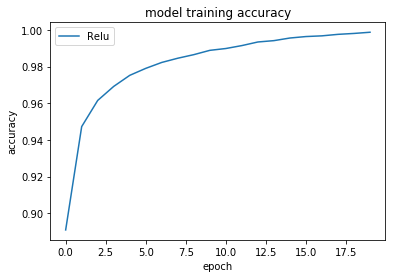

In [14]:
plt.plot(model_out.history["acc"])

plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["Relu"],loc="best")
plt.show()

## 結論

利用funtional API 來建立神經網路的架構

其結果為：

*   訓練資料

  正確率：99.88%
*   測試資料

  正確率：98.22%
  

由正確率來看算是一個不錯的模型。